In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Set up methods' colors
methods_colors = {
    "oracle": "#FFFFFF",
    "avg_ens": "#FF7133",
    "best_ms": "#33D4FF",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF",
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}

In [73]:
result = pd.read_csv('../../results/execution_time/all_inference_time.csv', index_col=0)
result_info = pd.read_csv('../../results/accuracy/all_accuracy_VUS_PR.csv', index_col=0)[['data_len']]

result_all = pd.concat([result, result_info], axis=1).dropna()
result_all = result_all.loc[result_all['data_len'] < 300000]
result_all = result_all.rename(columns={"Avg Ens.": "Avg Ens"})

In [72]:
all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
figure_path = '../../paper_submission_files/figures/{}.svg'

methods_conv = [
    'inception_time_{}',
    'convnet_{}',
    'resnet_{}',]

methods_sit = [
    'sit_conv_{}',
    'sit_linear_{}',
    'sit_stem_{}',
    'sit_stem_relu_{}',]

methods_ts = ['rocket_{}']

methods_classical = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}']

old_method = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM',
       'PCA', 'AE', 'CNN', 'LSTM', 'POLY']

methods_ens = [meth.format(length) for meth in methods_conv for length in all_length]
methods_ens += [meth.format(length) for meth in methods_sit for length in all_length]
methods_ens += [meth.format(length) for meth in methods_ts for length in all_length]
methods_ens += [meth.format(length) for meth in methods_classical for length in all_length]

In [40]:
list(result_all.columns)

['filename',
 'NORMA',
 'IFOREST1',
 'IFOREST',
 'MP',
 'HBOS',
 'POLY',
 'OCSVM',
 'AE',
 'PCA',
 'LOF',
 'CNN',
 'LSTM',
 'Avg Ens',
 'dataset',
 'inception_time_16',
 'inception_time_32',
 'inception_time_64',
 'inception_time_128',
 'inception_time_256',
 'inception_time_512',
 'inception_time_768',
 'inception_time_1024',
 'convnet_16',
 'convnet_32',
 'convnet_64',
 'convnet_128',
 'convnet_256',
 'convnet_512',
 'convnet_768',
 'convnet_1024',
 'resnet_16',
 'resnet_32',
 'resnet_64',
 'resnet_128',
 'resnet_256',
 'resnet_512',
 'resnet_768',
 'resnet_1024',
 'sit_conv_16',
 'sit_conv_32',
 'sit_conv_64',
 'sit_conv_128',
 'sit_conv_256',
 'sit_conv_512',
 'sit_conv_768',
 'sit_conv_1024',
 'sit_linear_16',
 'sit_linear_32',
 'sit_linear_64',
 'sit_linear_128',
 'sit_linear_256',
 'sit_linear_512',
 'sit_linear_768',
 'sit_linear_1024',
 'sit_stem_16',
 'sit_stem_32',
 'sit_stem_64',
 'sit_stem_128',
 'sit_stem_256',
 'sit_stem_512',
 'sit_stem_768',
 'sit_stem_1024',
 'sit_ste

In [43]:
def get_avg_exec(method, bins):
    all_means = []
    all_stds = []
    for i in range(len(bins)-1):
        all_vals = list(result_all.loc[result_all['data_len'] < bins[i+1]].loc[result_all['data_len'] > bins[i]][method].values)
        mean_vals = np.mean(all_vals)
        std_vals = np.std(all_vals)
        
        all_means.append(mean_vals)
        all_stds.append(std_vals)
        
    return all_means, all_stds

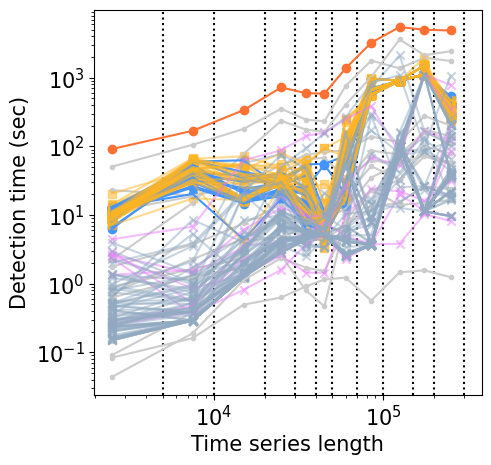

In [52]:
bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 150000, 200000, 300000]
bins_pos = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

plt.figure(figsize=(5, 5))

for bin in bins:
    plt.axvline(bin, color='black',linestyle='dotted')

# Plot Detectors
for methods in old_method:
    means, stds = get_avg_exec(method=methods, bins=bins)
    plt.plot(bins_pos, means, color=methods_colors['detectors'])
    plt.scatter(bins_pos, means, color=methods_colors['detectors'], marker='.')
    #plt.fill_between(bins_pos,np.array(means) - np.array(stds),np.array(means) + np.array(stds))

# Plot Convolutional-based
for methods in methods_conv:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['conv'])
        plt.scatter(bins_pos, means, color=methods_colors['conv'], marker='o')
        
# Plot Transformer-based
for methods in methods_sit:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['sit'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['sit'], marker='s', alpha=0.5)
        
# Plot Rocket
for methods in methods_ts:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['rocket'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['rocket'], marker='x', alpha=0.5)

# Plot Feature-based
for methods in methods_classical:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['feature_based'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['feature_based'], marker='x', alpha=0.5)

# Plot Average Ensembling
means, stds = get_avg_exec(method='Avg Ens', bins=bins)
plt.plot(bins_pos, means, color=methods_colors['avg_ens'])
plt.scatter(bins_pos, means, color=methods_colors['avg_ens'])

# Figure set up
plt.ylabel('Detection time (sec)')
plt.xlabel('Time series length')
plt.yscale('log')
plt.xscale('log')
plt.show()

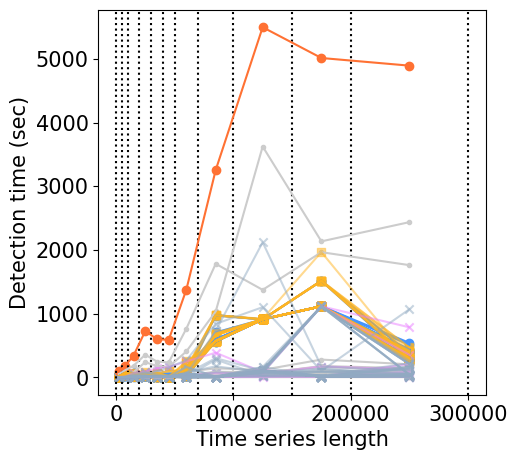

In [56]:
bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 150000, 200000, 300000]
bins_pos = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

plt.figure(figsize=(5, 5))

for bin in bins:
    plt.axvline(bin, color='black',linestyle='dotted')

# Plot Detectors
for methods in old_method:
    means, stds = get_avg_exec(method=methods, bins=bins)
    plt.plot(bins_pos, means, color=methods_colors['detectors'])
    plt.scatter(bins_pos, means, color=methods_colors['detectors'], marker='.')
    #plt.fill_between(bins_pos,np.array(means) - np.array(stds),np.array(means) + np.array(stds))

# Plot Convolutional-based
for methods in methods_conv:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['conv'])
        plt.scatter(bins_pos, means, color=methods_colors['conv'], marker='o')
        
# Plot Transformer-based
for methods in methods_sit:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['sit'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['sit'], marker='s', alpha=0.5)
        
# Plot Rocket
for methods in methods_ts:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['rocket'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['rocket'], marker='x', alpha=0.5)

# Plot Feature-based
for methods in methods_classical:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        plt.plot(bins_pos, means, color=methods_colors['feature_based'], alpha=0.5)
        plt.scatter(bins_pos, means, color=methods_colors['feature_based'], marker='x', alpha=0.5)

# Plot Average Ensembling
means, stds = get_avg_exec(method='Avg Ens', bins=bins)
plt.plot(bins_pos, means, color=methods_colors['avg_ens'])
plt.scatter(bins_pos, means, color=methods_colors['avg_ens'])

# Figure set up
plt.ylabel('Detection time (sec)')
plt.xlabel('Time series length')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

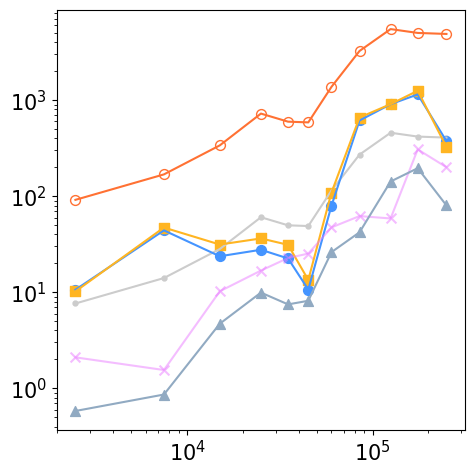

In [74]:
plt.figure(figsize=(5, 5))

plt.rcParams.update({'font.size': 15})

# Plot Detectors
all_means = []
for methods in old_method:
    means, stds = get_avg_exec(method=methods, bins=bins)
    all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['detectors'])
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['detectors'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['detectors'], marker='.', s=50)

# Plot Convolutional-based
all_means = []
for methods in methods_conv:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['conv'])
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['conv'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['conv'], marker='o', s=50)
        
# Plot Transformer-based
all_means = []
for methods in methods_sit:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['sit'], alpha=1)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['sit'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['sit'], marker='s', alpha=1, s=50)

# Plot Rocket
all_means = []
for methods in methods_ts:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['rocket'], alpha=0.5)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['rocket'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['rocket'], marker='x', alpha=0.5, s=50)

# Plot Feature-based
all_means = []        
for methods in methods_classical:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['feature_based'], alpha=1)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['feature_based'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['feature_based'], marker='^', alpha=1, s=50)

# Plot Average Ensembling
means, stds = get_avg_exec(method='Avg Ens', bins=bins)
plt.plot(bins_pos, means, color=methods_colors['avg_ens'])
plt.scatter(bins_pos, means, color='white', s=50, edgecolors=methods_colors['avg_ens'])

# Figure set up     
#plt.ylabel('Detection time (sec)')
#plt.xlabel('Time series length')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.savefig(figure_path.format("7_scalability_test_1"))
plt.show()
plt.close()

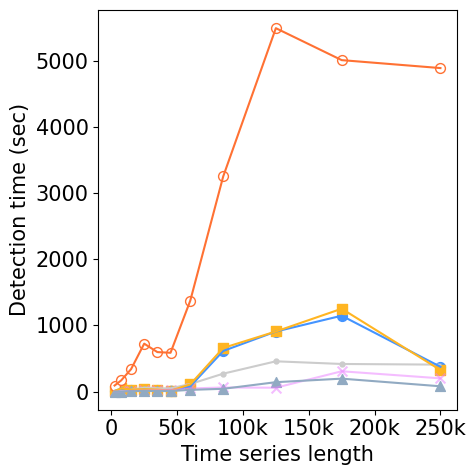

In [75]:
plt.figure(figsize=(5, 5))

plt.rcParams.update({'font.size': 15})

# Plot Detectors
all_means = []
for methods in old_method:
    means, stds = get_avg_exec(method=methods, bins=bins)
    all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['detectors'])
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['detectors'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['detectors'], marker='.', s=50)

# Plot Convolutional-based
all_means = []
for methods in methods_conv:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['conv'])
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['conv'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['conv'], marker='o', s=50)
        
# Plot Transformer-based
all_means = []
for methods in methods_sit:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['sit'], alpha=1)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['sit'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['sit'], marker='s', alpha=1, s=50)

# Plot Rocket
all_means = []
for methods in methods_ts:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['rocket'], alpha=0.5)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['rocket'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['rocket'], marker='x', alpha=0.5, s=50)

# Plot Feature-based
all_means = []        
for methods in methods_classical:
    for length in all_length:
        means, stds = get_avg_exec(method=methods.format(length), bins=bins)
        all_means.append(means)
plt.plot(bins_pos, np.mean(all_means, 0), color=methods_colors['feature_based'], alpha=1)
#plt.fill_between(bins_pos, np.min(all_means, 0), np.max(all_means, 0), color=methods_colors['feature_based'], alpha=0.2)
plt.scatter(bins_pos, np.mean(all_means, 0), color=methods_colors['feature_based'], marker='^', alpha=1, s=50)

# Plot Average Ensembling
means, stds = get_avg_exec(method='Avg Ens', bins=bins)
plt.plot(bins_pos, means, color=methods_colors['avg_ens'])
plt.scatter(bins_pos, means, color='white', s=50, edgecolors=methods_colors['avg_ens'])

# Figure set up     
plt.ylabel('Detection time (sec)')
plt.xlabel('Time series length')    
plt.xticks([0, 50000, 100000, 150000, 200000, 250000], ['0', '50k', '100k', '150k', '200k', '250k'])

plt.tight_layout()
plt.savefig(figure_path.format("7_scalability_test_2"))
plt.show()
plt.close()